<a href="https://colab.research.google.com/github/SONINJE/AI_system/blob/main/01_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import tensorflow as tf
import numpy as np

In [118]:
print(tf.__version__)

2.8.2


tf.constant(상수)
: 상수형 텐서로써 할당된 값의 변경이 불가

In [119]:
# (2, 2, 3)
d3_tensor = tf.constant([[[1, 2, 3],
                          [4, 5, 6]],
                         [[-1, -2, -3],
                          [-4, -5, -6]]])

In [121]:
d3_tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[-1, -2, -3],
        [-4, -5, -6]]], dtype=int32)>

In [122]:
d3_tensor[0, 0, 0] = 0

TypeError: ignored

In [ ]:
np_d3_tensor = d3_tensor.numpy()

In [ ]:
np_d3_tensor

In [123]:
np_d3_tensor[0, 0, 0] = 0

In [124]:
print(d3_tensor.ndim)
print(d3_tensor.shape)
print(d3_tensor.dtype)

3
(2, 2, 3)
<dtype: 'int32'>


tf.Variable(변수):  assign(value) 같은 메소드를 통해 할당된 값의 변경 가능

In [125]:
d3_np_tensor = np.array([[[1, 2, 3],
                          [4, 5, 6]],
                         [[-1, -2, -3],
                          [-4, -5, -6]]])

In [126]:
d3_np_tensor = d3_np_tensor.astype(np.float32)

In [127]:
d3_np_tensor.dtype

dtype('float32')

In [128]:
d3_var_tensor = tf.Variable(d3_np_tensor)

In [129]:
d3_var_tensor

<tf.Variable 'Variable:0' shape=(2, 2, 3) dtype=float32, numpy=
array([[[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]],

       [[-1., -2., -3.],
        [-4., -5., -6.]]], dtype=float32)>

In [130]:
print(d3_var_tensor.ndim)

AttributeError: ignored

In [131]:
print(d3_var_tensor.shape)
print(d3_var_tensor.dtype)

(2, 2, 3)
<dtype: 'float32'>


In [132]:
d3_var_tensor[0, 0, 0].assign(0)

<tf.Variable 'UnreadVariable' shape=(2, 2, 3) dtype=float32, numpy=
array([[[ 0.,  2.,  3.],
        [ 4.,  5.,  6.]],

       [[-1., -2., -3.],
        [-4., -5., -6.]]], dtype=float32)>

Practice

1. tensorflow 라이브러리를 이용하여 아래 속성 정보를 가지는 상수 텐서 객체 생성 및 속성 정보 출력

[출력 결과] 
차원        :  3
크기        :  (3, 1, 2)
데이터 타입 :  <dtype: 'int32'>

In [133]:
d3_tensor = tf.constant([[[1, 2]],
                        [[4, 5]],
                       [[6, 3]]])

2. 상수 텐서 객체의 값(ndarray) 복사하여 속성 정보 출력

[출력 결과]
차원        :  3
크기        :  (3, 1, 2)
데이터 타입 :  int32

In [134]:
np_d3_tenser = d3_tensor.numpy()

3. tensorflow 라이브러리를 이용하여 아래 속성 정보를 가지는 변수 텐서 객체 생성 및 속성 정보 출력


[출력 결과] 크기 : (2, 3, 1) 데이터 타입 : <dtype: 'int32'>

연산 : Numpy에서 사용 되는 대부분의 수학 연산을 동일한 방법으로 사용 가능 (TPU, GPU등 가속 하드웨어 이용하여 수행)

In [135]:
#(2, 3)
tensor_a = tf.constant([[1., 2., 3.],
                        [4., 5., 6.]])
#(2, 3)
tensor_b = tf.constant([[7., 8., 9.],
                        [10., 11., 12.]])

In [136]:
tensor_c = tensor_a + tensor_b
tensor_c

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 8., 10., 12.],
       [14., 16., 18.]], dtype=float32)>

In [137]:
tensor_d = tf.math.square(tensor_c)
tensor_d

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 64., 100., 144.],
       [196., 256., 324.]], dtype=float32)>

In [138]:
tensor_d = tf.square(tensor_c)
tensor_d

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 64., 100., 144.],
       [196., 256., 324.]], dtype=float32)>

In [139]:
tensor_e = tf.math.log(tensor_d)
tensor_e

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[4.158883 , 4.6051702, 4.9698133],
       [5.278115 , 5.5451775, 5.7807436]], dtype=float32)>

미분

In [140]:
tensor_var_a = tf.Variable([[1., 2., 3.],
                            [4., 5., 6.]])

tensor_var_b = tf.Variable([[7., 8., 9.],
                            [10., 11., 12.]])

In [141]:
tensor_var_a

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [142]:
tensor_var_b

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 7.,  8.,  9.],
       [10., 11., 12.]], dtype=float32)>

In [143]:
with tf.GradientTape() as tape:
  tensor_var_c = tf.square(tensor_var_a + tensor_var_b)
  gradient_ca = tape.gradient(target=tensor_var_c, sources=tensor_var_a)
  print(gradient_ca)

tf.Tensor(
[[16. 20. 24.]
 [28. 32. 36.]], shape=(2, 3), dtype=float32)


Practice

 tensorflow 연산자를 이용해 z = (x+y)^2 계산식에서 x 값이 z 값에 미치는 영향도(미분) 계산

 [출력 결과]
[[*.**  *.**  *.**]
 [*.**  *.**  *.**]]

In [144]:
tensor_x = tf.Variable([[1., 2., 3.],
                        [4., 5., 6.]])

tensor_y = tf.Variable([[7., 8., 9.],
                        [10., 11., 12.]])

In [145]:
with tf.GradientTape() as tape:

  tensor_z = tf.square(tensor_x + tensor_y)

  gradient_xz = tape.gradient(target=tensor_z, sources=tensor_x)
  
  print(np.round(gradient_xz), 2)

[[16. 20. 24.]
 [28. 32. 36.]] 2


Perceptron

In [146]:
# 파라미터 값(input 특성 개수, 퍼셉트론의 개수, 학습률) 설정
input_dim = 2
hidden_units = 1

In [147]:
# 가중치(input 특성 : 2/ 퍼셉트론 : 1)
w = tf.Variable(tf.random.uniform(shape=(input_dim, hidden_units)))

# 편향(퍼셉트론 : 1)
b = tf.Variable(tf.zeros(shape=()))

In [148]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.28051722],
       [0.03464222]], dtype=float32)>

In [149]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [150]:
# 퍼셉트론의 수학 모델 f(x*w + b)
def predict(input):
  x = tf.matmul(input, w) + b
  x = tf.maximum(0, x)
  return x

In [151]:
# loss(mse)
def mse_loss(labels, predictions):
  loss = tf.reduce_mean(tf.square(labels - predictions))
  return loss

In [177]:
# train
def train(inputs, labels):
  with tf.GradientTape() as tape:
    # 퍼셉트론 모델을 예측값을 계산
    predictions = predict(inputs)
    # 모델의 예측값과 정답간의 에러를 loss 을 이용해 계산
    loss = mse_loss(labels, predictions)
    # 모델의 변수(w, b) loss 값에 미치는 영향도를 미분(오차역전파)을 통해 계산
    gradient_lw, gradient_lb = tape.gradient(loss, [w, b])
  # 경사하강법을 수행해서 모델의 변수(w, b) 업데이트
  w.assign(w = learning_rate * gradient_lw)
  b.assign(b = learning_rate * gradient_lb)
  return loss

퍼셉트론 모델 학습을 위한 AND Gate 데이터 생성

In [178]:
# 퍼셉트론 모델 학습을 위한 AND Gate 데이터 생성
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

labels = np.array([0, 0, 0, 1], dtype=np.float32)

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

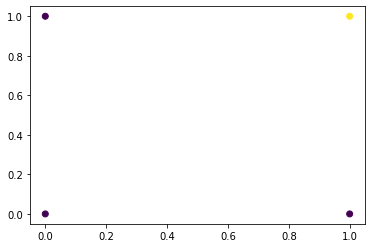

In [180]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:])

In [181]:

# train 함수를 반복적으로 실행하여 퍼셉트론 모델을 학습

for epoch in range(100):
  # input 데이터와 label 데이터를 한 건씩 추출하여 train 함수에 전달
  for x, y in zip(inputs, labels):
    loss = train([x], [y])

# 학습된 모델에 input 데이터 입력하여 예측결과 계산
predictions = predict(inputs)


NameError: ignored

In [164]:
print('*******모델의 예측 결과*******')
print(predictions[:]> 0.5)

*******모델의 예측 결과*******


NameError: ignored

In [163]:
test_inputs = np.random.uniform(0, 1, (5000, 2)).astype(np.float32)

In [162]:
test_inputs

NameError: ignored

In [161]:
predictions = predict(test_inputs)
plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=predictions[:]> 0.5)

NameError: ignored

practice

퍼셉트론 모델 학습을 위한 OR Gate 데이터 생성

In [160]:
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

labels = np.array([0, 1, 1, 1], dtype=np.float32)